In [ ]:
import pandas as pd
# 1. Create dummy data or load CSVs
customers = pd.DataFrame({
    'customer_id': [1, 2, 3],
    'name': ['Alice', 'Bob', 'Charlie'],
    'dob': ['1990-01-01', '1985-05-15', '1992-07-30'],
    'income': [900000, 700000, 850000]
})

loans = pd.DataFrame({
    'loan_id': [101, 102, 103],
    'customer_id': [1, 2, 3],
    'loan_type': ['Home', 'Car', 'Personal'],
    'loan_amount': [1000000, 500000, 300000]
})

# 2. Merge
merged = pd.merge(loans, customers, on='customer_id')

# 3. Ensure folder exists
import os
os.makedirs("../data", exist_ok=True)

# 4. Export to Excel
with pd.ExcelWriter('../data/final_exported_data.xlsx') as writer:
    customers.to_excel(writer, sheet_name='Customers', index=False)
    loans.to_excel(writer, sheet_name='Loans', index=False)
    merged.to_excel(writer, sheet_name='Loan Details', index=False)


In [ ]:
with pd.ExcelWriter('../data/final_exported_data.xlsx') as writer:
    customers.to_excel(writer, sheet_name='Customers', index=False)
    loans.to_excel(writer, sheet_name='Loans', index=False)
    merged.to_excel(writer, sheet_name='Loan Details', index=False)


import pandas as pd
import os

# 1. Create dummy data
customers = pd.DataFrame({
    'customer_id': [1, 2, 3],
    'name': ['Alice', 'Bob', 'Charlie'],
    'dob': ['1990-01-01', '1985-05-15', '1992-07-30'],
    'income': [900000, 700000, 850000]
})

accounts = pd.DataFrame({
    'account_id': [201, 202, 203],
    'customer_id': [1, 2, 3],
    'account_type': ['Savings', 'Current', 'Savings'],
    'balance': [200000, 150000, 300000]
})

loans = pd.DataFrame({
    'loan_id': [101, 102, 103],
    'customer_id': [1, 2, 3],
    'loan_type': ['Home', 'Car', 'Personal'],
    'loan_amount': [1000000, 500000, 300000]
})

transactions = pd.DataFrame({
    'transaction_id': [1001, 1002, 1003],
    'account_id': [201, 202, 203],
    'amount': [5000, 10000, 7500],
    'transaction_type': ['Debit', 'Credit', 'Debit'],
    'transaction_date': ['2023-06-01', '2023-06-05', '2023-06-07']
})

# 2. Merge loan and customer for loan details
merged_loans = pd.merge(loans, customers, on='customer_id')
merged_accounts = pd.merge(accounts, customers, on='customer_id')

# 3. Create output directory
os.makedirs("../data", exist_ok=True)

# 4. Export all to Excel
with pd.ExcelWriter('../data/final_exported_data.xlsx') as writer:
    customers.to_excel(writer, sheet_name='Customers', index=False)
    accounts.to_excel(writer, sheet_name='Accounts', index=False)
    loans.to_excel(writer, sheet_name='Loans', index=False)
    transactions.to_excel(writer, sheet_name='Transactions', index=False)
    merged_loans.to_excel(writer, sheet_name='Loan Details', index=False)
    merged_accounts.to_excel(writer, sheet_name='Account Details', index=False)

marketing = pd.DataFrame({
    'campaign_id': [301, 302, 303],
    'customer_id': [1, 2, 3],
    'campaign_name': ['Summer Loan Offer', 'New FD Plan', 'Credit Card Bonus'],
    'contact_date': ['2023-06-10', '2023-06-15', '2023-06-17'],
    'response': ['Yes', 'No', 'Yes']
})

merged_marketing = pd.merge(marketing, customers, on='customer_id')

with pd.ExcelWriter('../data/final_exported_data.xlsx', engine='openpyxl', mode='a') as writer:
    marketing.to_excel(writer, sheet_name='Marketing', index=False)
    merged_marketing.to_excel(writer, sheet_name='Campaign Details', index=False)


In [ ]:
loan_summary = loans.groupby('loan_type')['loan_amount'].sum().reset_index()
with pd.ExcelWriter('../data/final_exported_data.xlsx', engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    loan_summary.to_excel(writer, sheet_name='Loan Summary', index=False)


In [ ]:
import pandas as pd

# Read back the exported Excel file
with pd.ExcelFile('../data/final_exported_data.xlsx') as xls:
    print(xls.sheet_names)  # should show: ['Customers', 'Loans', 'Loan Details', 'Loan Summary']
    df_summary = pd.read_excel(xls, sheet_name='Loan Summary')
    print(df_summary.head())


['Customers', 'Accounts', 'Loans', 'Transactions', 'Loan Details', 'Account Details', 'Marketing', 'Campaign Details', 'Loan Summary']
  loan_type  loan_amount
0       Car       500000
1      Home      1000000
2  Personal       300000


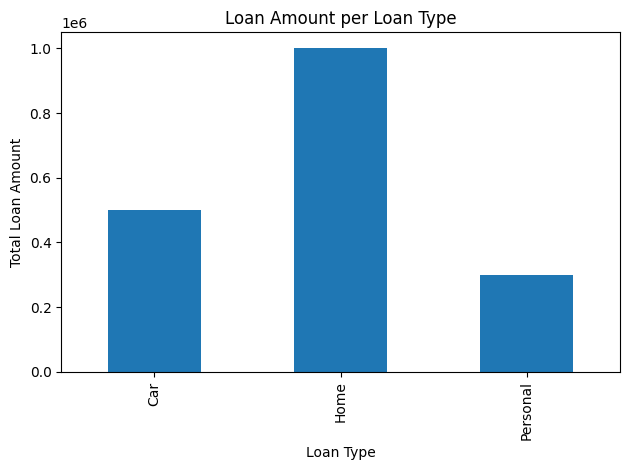

In [ ]:
import matplotlib.pyplot as plt

loan_summary.plot(kind='bar', x='loan_type', y='loan_amount', legend=False)
plt.title("Loan Amount per Loan Type")
plt.xlabel("Loan Type")
plt.ylabel("Total Loan Amount")
plt.tight_layout()
plt.show()



In [ ]:
merged_with_accounts = pd.merge(merged, accounts, on='customer_id', how='left')
merged_with_accounts.head()


,loan_id,customer_id,loan_type,loan_amount,name,dob,income,account_id,account_type,balance
0,101,1,Home,1000000,Alice,1990-01-01,900000,201,Savings,200000
1,102,2,Car,500000,Bob,1985-05-15,700000,202,Current,150000
2,103,3,Personal,300000,Charlie,1992-07-30,850000,203,Savings,300000


In [ ]:
loan_marketing = pd.merge(merged, marketing, on='customer_id', how='left')
loan_marketing.head()


,loan_id,customer_id,loan_type,loan_amount,name,dob,income,campaign_id,campaign_name,contact_date,response
0,101,1,Home,1000000,Alice,1990-01-01,900000,301,Summer Loan Offer,2023-06-10,Yes
1,102,2,Car,500000,Bob,1985-05-15,700000,302,New FD Plan,2023-06-15,No
2,103,3,Personal,300000,Charlie,1992-07-30,850000,303,Credit Card Bonus,2023-06-17,Yes


In [ ]:
# Total loan amount by campaign
campaign_loan = loan_marketing.groupby('campaign_name')['loan_amount'].sum().reset_index()
print(campaign_loan)


       campaign_name  loan_amount
0  Credit Card Bonus       300000
1        New FD Plan       500000
2  Summer Loan Offer      1000000


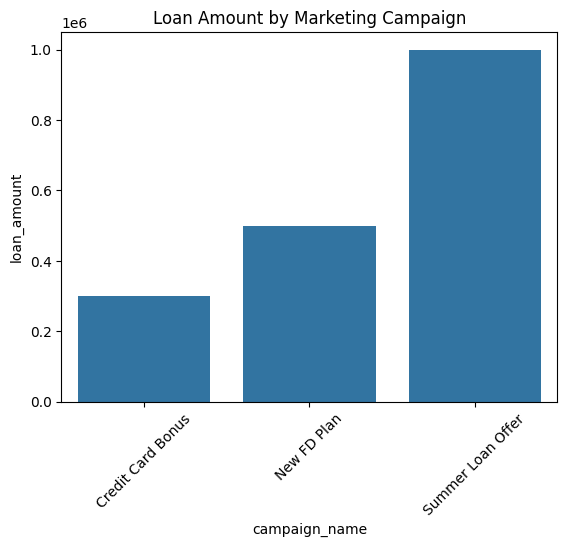

In [ ]:
import seaborn as sns
sns.barplot(x='campaign_name', y='loan_amount', data=campaign_loan)
plt.xticks(rotation=45)
plt.title('Loan Amount by Marketing Campaign')
plt.show()


In [ ]:
with pd.ExcelWriter('../data/final_exported_data.xlsx', engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    campaign_loan.to_excel(writer, sheet_name='Campaign Loan', index=False)
    merged_with_accounts.to_excel(writer, sheet_name='Accounts Merged', index=False)



In [ ]:
import pandas as pd

# Create customer DataFrame
customers = pd.DataFrame({
    'customer_id': [1, 2, 3],
    'name': ['Alice', 'Bob', 'Charlie'],
    'dob': ['1990-01-01', '1985-05-15', '1992-07-30'],
    'income': [900000, 700000, 850000]
})

# Convert dob to datetime
customers['dob'] = pd.to_datetime(customers['dob'])

# Add age column
customers['age'] = pd.to_datetime('today').year - customers['dob'].dt.year

# Display
print(customers)


   customer_id     name        dob  income  age
0            1    Alice 1990-01-01  900000   35
1            2      Bob 1985-05-15  700000   40
2            3  Charlie 1992-07-30  850000   33


In [ ]:
high_income_customers = customers[customers['income'] > 800000]
print("High-income customers:")
print(high_income_customers)
# Assuming you have a loans DataFrame
merged_df = pd.merge(loans, customers, on='customer_id')
print(merged_df.head())


High-income customers:
   customer_id     name        dob  income  age
0            1    Alice 1990-01-01  900000   35
2            3  Charlie 1992-07-30  850000   33
   loan_id  customer_id loan_type  loan_amount     name        dob  income  \
0      101            1      Home      1000000    Alice 1990-01-01  900000   
1      102            2       Car       500000      Bob 1985-05-15  700000   
2      103            3  Personal       300000  Charlie 1992-07-30  850000   

   age  
0   35  
1   40  
2   33  


In [ ]:
import numpy as np

# Example logic: assign randomly
np.random.seed(42)
loans['status'] = np.random.choice(['Active', 'Closed'], size=len(loans))


In [ ]:
from google.colab import files
files.download('final_exported_data.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>